In [115]:
import numpy as np
%matplotlib widget
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch as tc
import gen_comp_plot as gcp
from p_power import *
from project.blueprints.pyhton.msd_Dmom import *
import msd_adam as msda
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
A = tc.complex(tc.Tensor([[2, 1], [1, 2]]), tc.zeros(2, 2))
U = tc.complex(tc.Tensor([[1, 1], [1, -1]]), tc.zeros(2, 2)) / np.sqrt(2)

In [117]:

pa = np.arange(1, 5, .1)
# pb = np.arange(1, 5, 0.1)
# pc = np.arange(1, 5, 0.2)
# pd = np.arange(1, 5, 0.3)
# pe = np.arange(1, 5, 0.4)
# pf = np.arange(1, 5, 0.5)
# pg = np.arange(1, 5, 1)
print(pa)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9]


In [118]:

# # a = [max_sim_diag(A, U, p, step=0)[0] for p in tqdm(pa)]
# # b = [max_sim_diag(A, U, p, step=0.01)[0] for p in tqdm(pa)]
# c = [max_sim_diag(A, U, p, step=0.1)[0] for p in tqdm(pa)]
# # d = [max_sim_diag(A, U, p, step=0.5)[0] for p in tqdm(pa)]
# # b = [max_sim_diag(A, U, p)[0] for p in tqdm(pb)]
# # c = [max_sim_diag(A, U, p)[0] for p in tqdm(pc)]
# # d = [max_sim_diag(A, U, p)[0] for p in tqdm(pd)]
# # e = [max_sim_diag(A, U, p)[0] for p in tqdm(pe)]
# # f = [max_sim_diag(A, U, p)[0] for p in tqdm(pf)]
# # g = [max_sim_diag(A, U, p)[0] for p in tqdm(pg)]aaaaaaa
# default = [max_sim_diag(A, U, p)[1] for p in tqdm(pa)]


In [119]:
# figure2 = plt.figure()
# # plt.plot(pa, a, label='step=0')
# # plt.plot(pa, b, label='step=0.01')
# plt.plot(pa, c, label='step=0.1')
# # plt.plot(pa, d, label='step=0.5')
# plt.plot(pa, default, label='power method', linestyle='--')
# # plt.plot(pb, b, label='.1')
# # plt.plot(pc, c, label='.2')
# # plt.plot(pd, d, label='.3')
# # plt.plot(pe, e, label='.4')
# # plt.plot(pf, f, label='.5')
# # plt.plot(pg, g, label='1')
# plt.legend()
# # qs = 1 - 1 / (1 - ps)
# # plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
# plt.show()

100%|██████████| 40/40 [18:27<00:00, 27.70s/it]


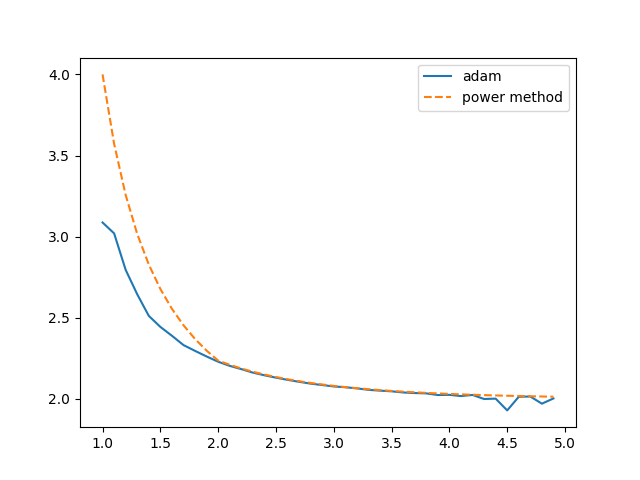

In [120]:
figure3 = plt.figure()
ps = np.arange(1, 5, 0.1)
# norms = [max_sim_diag(A, U, p, step=.01) for p in tqdm(ps)]
# b, a = zip(*norms)
# b = [x.item() for x in b]
# a = [x.item() for x in a]
adam_norms = [msda.max_sim_diag(A, U, p, err_a=1e-6, step=1e-3, lyfe_cycle=2) for p in tqdm(ps)]
G, a = zip(*adam_norms)
G = [x.item() for x in G]
a = [x.item() for x in a]
plt.plot(ps, G, label='Adam\'s Genetics of BA')
# plt.plot(ps, b, label='gradient with momentum')
plt.plot(ps, a, label='Power Method of A', linestyle='--')
plt.legend()
# qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()